In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
df= pd.read_csv("/kaggle/input/phising-detection-dataset/Phising_Detection_Dataset.csv")

In [3]:
#!pip install skimpy

In [4]:
from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 662591 │ │ int64       │ 10    │                                                          │
│ │ Number of columns │ 11     │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name      ┃ NA     ┃ NA %  ┃ mean      ┃ sd       ┃ p0 ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ Unnamed: 0       │      0 │     0 │    331300 │   191300 │  0 │ 165600 │ 331300 │ 496900 │ 662600 │ ▇▇▇▇▇▇ │  │
│ │ NumDots          │      0 │     0 │     2.195 │     1.49 │  0 │      1 │      2 │      3 │     42 │   ▇    │  │
│ │ UrlLength        │      0 │     0 │     60.25 │     44.6 │  1 │     32 │     48 │     77 │   2175 │   ▇    │  │
│ │ NumDash          │      0 │     0 │     1.552 │    2.974 │  0 │      0 │      0 │      2 │     87 │   ▇    │  │
│ │ AtSymbol         │      0 │     0 │  0.002185 │  0.05376 │  0 │      0 │      0 │      0 │     10 │   ▇    │  │
│ │ IpAddress        │      0 │     0 │   0.01128 │   0.1056 │  0 │      0 │      0 │      0 │      1 │   ▇    │  │
│ │ HttpsInHostname  │      0 │     0 │   0.02599 │   0.1625 │  0 │      0 │      0 │      0 │      5 │   ▇    │  │
│ │ PathLevel        │      0 │     0 │     2.791 │    1.626 │  0 │      2 │      3 │      4 │     38 │   ▇    │  │
│ │ PathLength       │      0 │     0 │        41 │    29.72 │  0 │     21 │     35 │     53 │   2175 │   ▇    │  │
│ │ NumNumericChars  │      0 │     0 │    0.6525 │     1.43 │  0 │      0 │      1 │      1 │    111 │   ▇    │  │
│ │ Phising          │  32520 │  4.91 │    0.1587 │   0.3654 │  0 │      0 │      0 │      0 │      1 │ ▇    ▂ │  │
│ └──────────────────┴────────┴───────┴───────────┴──────────┴────┴────────┴────────┴────────┴────────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [5]:
df.head()

,Unnamed: 0,NumDots,UrlLength,NumDash,AtSymbol,IpAddress,HttpsInHostname,PathLevel,PathLength,NumNumericChars,Phising
0,0,3,72,0,0,0,0,5,44,0,1.0
1,1,3,144,0,0,0,0,3,16,41,1.0
2,2,3,58,0,0,0,0,2,24,0,1.0
3,3,3,79,1,0,0,0,6,50,0,1.0
4,4,3,46,0,0,0,0,4,29,2,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662591 entries, 0 to 662590
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       662591 non-null  int64  
 1   NumDots          662591 non-null  int64  
 2   UrlLength        662591 non-null  int64  
 3   NumDash          662591 non-null  int64  
 4   AtSymbol         662591 non-null  int64  
 5   IpAddress        662591 non-null  int64  
 6   HttpsInHostname  662591 non-null  int64  
 7   PathLevel        662591 non-null  int64  
 8   PathLength       662591 non-null  int64  
 9   NumNumericChars  662591 non-null  int64  
 10  Phising          630071 non-null  float64
dtypes: float64(1), int64(10)
memory usage: 55.6 MB


In [7]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
df.dtypes

NumDots              int64
UrlLength            int64
NumDash              int64
AtSymbol             int64
IpAddress            int64
HttpsInHostname      int64
PathLevel            int64
PathLength           int64
NumNumericChars      int64
Phising            float64
dtype: object

In [9]:
df.shape

(662591, 10)

In [10]:
df.isna().sum()

NumDots                0
UrlLength              0
NumDash                0
AtSymbol               0
IpAddress              0
HttpsInHostname        0
PathLevel              0
PathLength             0
NumNumericChars        0
Phising            32520
dtype: int64

In [11]:
# Impute missing values in the target column
df['Phising'].fillna(df['Phising'].mode()[0], inplace=True)

/tmp/ipykernel_864/273949090.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Phising'].fillna(df['Phising'].mode()[0], inplace=True)


In [12]:
# Convert the target column to integer type
df['Phising'] = df['Phising'].astype(int)


In [13]:
df.isna().sum()

NumDots            0
UrlLength          0
NumDash            0
AtSymbol           0
IpAddress          0
HttpsInHostname    0
PathLevel          0
PathLength         0
NumNumericChars    0
Phising            0
dtype: int64

In [14]:
df.dtypes

NumDots            int64
UrlLength          int64
NumDash            int64
AtSymbol           int64
IpAddress          int64
HttpsInHostname    int64
PathLevel          int64
PathLength         int64
NumNumericChars    int64
Phising            int64
dtype: object

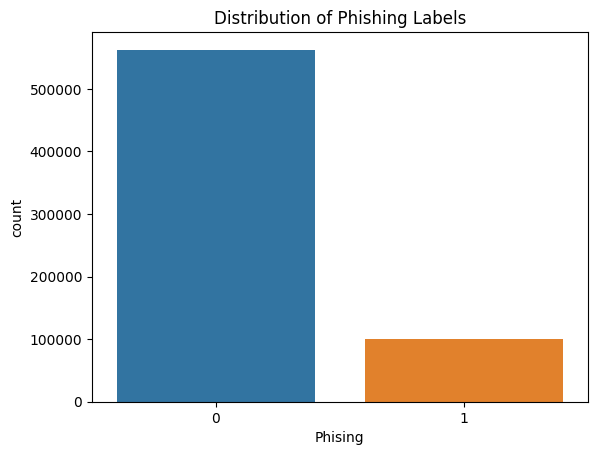

In [15]:
# Distribution of Phishing Labels
sns.countplot(x='Phising', data=df)
plt.title("Distribution of Phishing Labels")
plt.show()

In [16]:
df['Phising'].value_counts()

Phising
0    562580
1    100011
Name: count, dtype: int64

In [17]:
# Separate features and target variable
X = df.drop(columns=['Phising'])  # Drop target column and unnecessary columns
y = df['Phising']


In [18]:
X.head()

,NumDots,UrlLength,NumDash,AtSymbol,IpAddress,HttpsInHostname,PathLevel,PathLength,NumNumericChars
0,3,72,0,0,0,0,5,44,0
1,3,144,0,0,0,0,3,16,41
2,3,58,0,0,0,0,2,24,0
3,3,79,1,0,0,0,6,50,0
4,3,46,0,0,0,0,4,29,2


In [19]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Phising, dtype: int64

In [20]:
# Identify numerical and binary columns
numerical_cols = ['NumDots', 'UrlLength', 'NumDash', 'PathLevel', 'PathLength', 'NumNumericChars']
binary_cols = ['AtSymbol', 'IpAddress', 'HttpsInHostname']


In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
# Apply SMOTE to balance the classes in the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

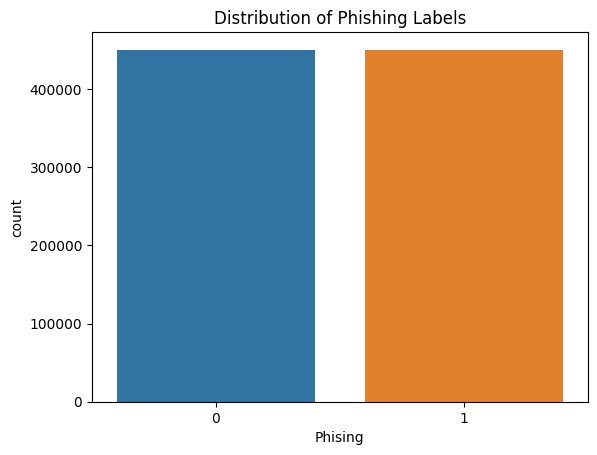

In [24]:
# Distribution of Phishing Labels
sns.countplot(x=y_train_resampled, data=df)
plt.title("Distribution of Phishing Labels")
plt.show()

In [25]:
# Standardize the numerical features using StandardScaler
scaler = StandardScaler()
numerical_cols = ['NumDots', 'UrlLength', 'NumDash', 'PathLevel', 'PathLength', 'NumNumericChars']
X_train_resampled[numerical_cols] = scaler.fit_transform(X_train_resampled[numerical_cols])  # Standardize only numerical columns
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])  

In [26]:
# Train a Random Forest Classifier as an example model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier()

In [27]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)



In [28]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.81      0.88    112580
           1       0.44      0.84      0.58     19939

    accuracy                           0.82    132519
   macro avg       0.70      0.83      0.73    132519
weighted avg       0.89      0.82      0.84    132519

Confusion Matrix:
[[91453 21127]
 [ 3156 16783]]


In [29]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [30]:
# Model Training
# 1. Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_resampled, y_train_resampled)


LogisticRegression()

In [31]:

#Gradient Boosting Classifier

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_resampled, y_train_resampled)


GradientBoostingClassifier()

In [33]:
# Model Evaluation (Accuracy and other metrics)
models = [lr_model, rf_model, gb_model]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']


In [34]:
# Function to print model evaluation metrics
def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    plt.figure(figsize=(6, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

--- Logistic Regression ---
Accuracy: 0.5780680506191564
              precision    recall  f1-score   support

           0       0.94      0.54      0.68    112580
           1       0.24      0.81      0.37     19939

    accuracy                           0.58    132519
   macro avg       0.59      0.67      0.53    132519
weighted avg       0.84      0.58      0.64    132519



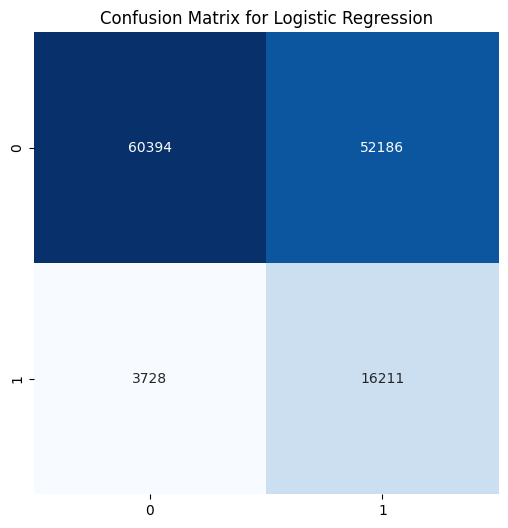

--- Random Forest ---
Accuracy: 0.8167583516325961
              precision    recall  f1-score   support

           0       0.97      0.81      0.88    112580
           1       0.44      0.84      0.58     19939

    accuracy                           0.82    132519
   macro avg       0.70      0.83      0.73    132519
weighted avg       0.89      0.82      0.84    132519



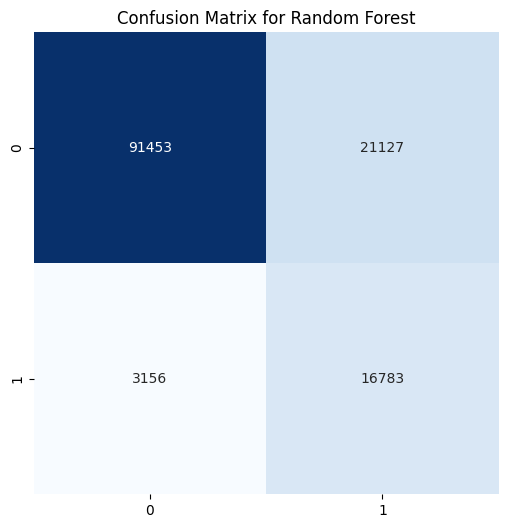

--- Gradient Boosting ---
Accuracy: 0.7368377364755243
              precision    recall  f1-score   support

           0       0.96      0.72      0.82    112580
           1       0.34      0.83      0.49     19939

    accuracy                           0.74    132519
   macro avg       0.65      0.77      0.65    132519
weighted avg       0.87      0.74      0.77    132519



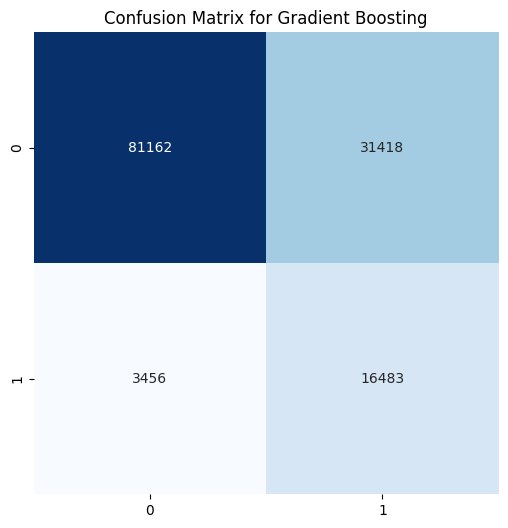

In [35]:
# Evaluate all models
for model, name in zip(models, model_names):
    evaluate_model(model, X_test, y_test, name)


In [36]:
# Cross Validation (Optional)
for model, name in zip(models, model_names):
    scores = cross_val_score(model, X, y, cv=5)
    print(f"Cross-validation scores for {name}: {scores}")
    print(f"Mean CV Score for {name}: {np.mean(scores)}")

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validation scores for Logistic Regression: [0.85120624 0.8560422  0.85052597 0.8486017  0.7510225 ]
Mean CV Score for Logistic Regression: 0.8314797216887635
Cross-validation scores for Random Forest: [0.86967152 0.87831842 0.90334898 0.86807075 0.65202463]
Mean CV Score for Random Forest: 0.8342868596394167
Cross-validation scores for Gradient Boosting: [0.84070963 0.85131077 0.87363981 0.86359589 0.6954376 ]
Mean CV Score for Gradient Boosting: 0.8249387393265305


In [37]:
# Feature Importances (for Random Forest or Gradient Boosting)
# Random Forest Feature Importances
feature_importances = rf_model.feature_importances_
features = X.columns

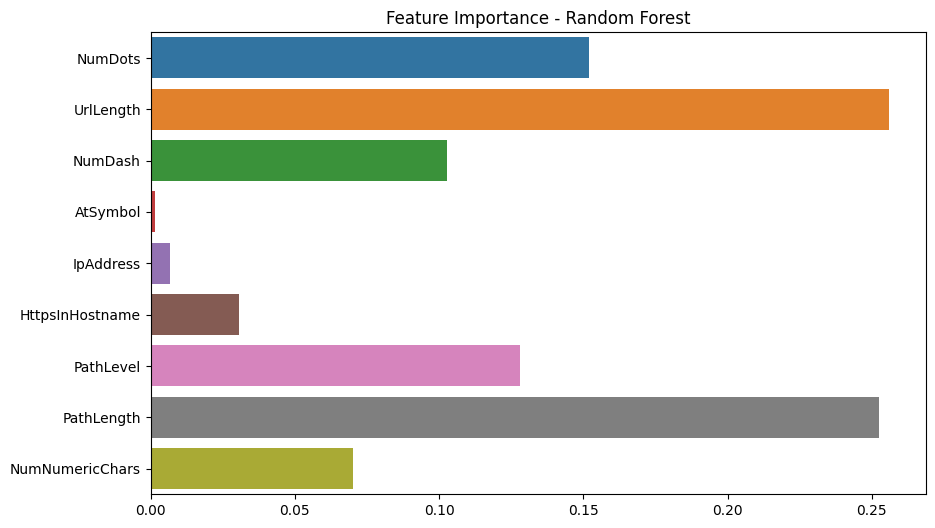

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance - Random Forest")
plt.show()
